In [1]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# 2. Load Your Actual Data
# Replace 'student_performance_data.csv' with the actual path to your dataset
data = pd.read_csv('Student_performance_data _.csv')

# Display the first few rows of the dataset to understand its structure
print("Dataset preview:\n", data.head())

Dataset preview:
    StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  


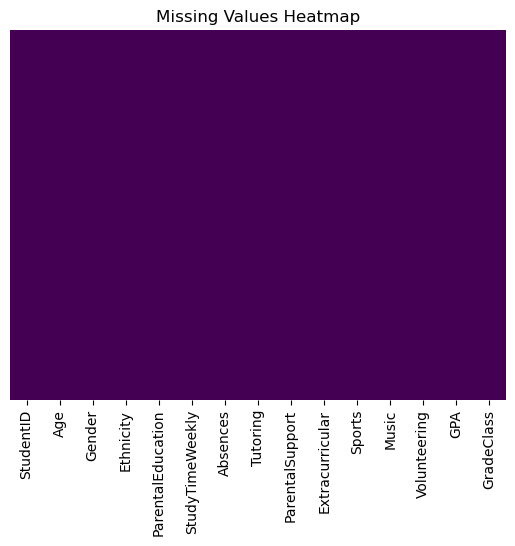

In [3]:
# 3. Check for Missing Values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Drop rows with missing values for simplicity
data.dropna(inplace=True)

C:\Users\Keerthika Baktha\AppData\Local\Temp\ipykernel_12668\433089372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GradeClass', data=data, palette='RdBu_r')


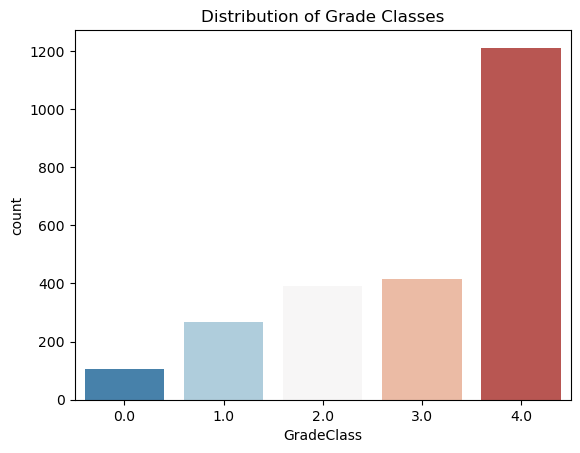

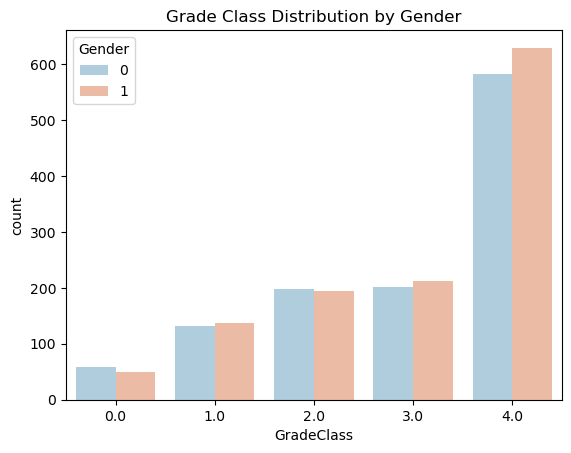

In [4]:
# 4. Visualize Target Distribution
sns.countplot(x='GradeClass', data=data, palette='RdBu_r')
plt.title('Distribution of Grade Classes')
plt.show()

# Visualize relationships (e.g., GradeClass by Gender)
sns.countplot(x='GradeClass', hue='Gender', data=data, palette='RdBu_r')
plt.title('Grade Class Distribution by Gender')
plt.legend(title='Gender')
plt.show()

In [5]:
# 5. Prepare the Features and Target Variable
X = data.drop(columns=['GradeClass'])  # Drop the target column to get features
y = data['GradeClass']  # Assign the target variable

# Convert categorical variables (if any) into dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale the training data
X_test_scaled = scaler.transform(X_test)  # Scale the test data


In [6]:
# 6. Train the Logistic Regression Model
logmodel = LogisticRegression(max_iter=300)  # Increased number of iterations for convergence
logmodel.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=300)

In [7]:
# 7. Evaluate the Model
predictions = logmodel.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, predictions))



Classification Report:
               precision    recall  f1-score   support

         0.0       0.29      0.12      0.17        33
         1.0       0.40      0.36      0.38        80
         2.0       0.55      0.64      0.59       121
         3.0       0.67      0.50      0.58       127
         4.0       0.88      0.97      0.93       357

    accuracy                           0.73       718
   macro avg       0.56      0.52      0.53       718
weighted avg       0.71      0.73      0.71       718



In [8]:
# 8. Function to Predict GradeClass for User Input
def predict_grade_class(input_data, model, scaler, feature_columns):
    """
    Predicts the GradeClass for a new student based on input features.

    Args:
    - input_data: List containing feature values for the student.
    - model: Trained Logistic Regression model.
    - scaler: Fitted StandardScaler for feature standardization.
    - feature_columns: List of feature column names.

    Returns:
    - Predicted GradeClass for the student.
    """
    # Convert input data to a DataFrame
    input_df = pd.DataFrame([input_data], columns=feature_columns)
    # Standardize input features
    input_scaled = scaler.transform(input_df)
    # Predict GradeClass using the trained model
    predicted_class = model.predict(input_scaled)
    return predicted_class[0]


In [9]:
# 9. Function to Get User Input
def get_user_input(feature_columns):
    """
    Prompts the user to enter feature values for a new student.

    Returns:
    - List of feature values in the correct order.
    """
    print("\nEnter the following details for the student:")
    user_input = []
    for feature in feature_columns:
        while True:
            try:
                value = input(f"Enter value for '{feature}': ")
                user_input.append(float(value))  # Convert input to float
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")
    return user_input

In [ ]:
# 10. Main Program
if __name__ == "__main__":
    # Prompt user for input
    feature_columns = X.columns  # List of feature columns from the dataset
    user_input = get_user_input(feature_columns)
    
    # Predict GradeClass for user input
    predicted_grade = predict_grade_class(user_input, logmodel, scaler, feature_columns)
    
    # Map predicted GradeClass to readable grades
    grade_mapping = {
        0: 'A (GPA >= 3.5)',
        1: 'B (3.0 <= GPA < 3.5)',
        2: 'C (2.5 <= GPA < 3.0)',
        3: 'D (2.0 <= GPA < 2.5)',
        4: 'F (GPA < 2.0)'
    }
    print(f"\nThe predicted GradeClass for the student is: {grade_mapping[predicted_grade]}")



Enter the following details for the student:
